# **1.Importing libraries and data**

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import  keras

In [123]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

#Also we can import it with the following method :
#import sklearn
#housing_data = sklearn.datasets.fetch_california_housing

In [124]:
print(housing_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


We are trying to predict the house price using different variables

# **2.X_Y , Test_Train_validation splitting**

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train_full , x_test ,y_train_full , y_test =train_test_split(housing_data.data,
                                                               housing_data.target,
                                                               random_state = 42)

In [127]:
x_train , x_valid ,y_train , y_valid =train_test_split(x_train_full,
                                                       y_train_full,
                                                       random_state = 42)

# **3.prepering the data to work in the model**


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [130]:
x_train = scaler.fit_transform(x_train)

In [131]:
x_valid = scaler.fit_transform(x_valid)

In [132]:
x_test = scaler.fit_transform(x_test)

In [133]:
x_train.shape

(11610, 8)

In [134]:
input_shape = x_train.shape[1]

# **4.Creating the model**




---


### **1.Creating the Functional model NN layers**


---
it's called "functional API" bec we use every layer as a function in the next layer


In the functional API we create the layers first , then create the model

while in sequential API the opposite happens

In [135]:
input_ = keras.layers.Input(shape=x_train.shape[1:])

In [136]:
hidden1 = keras.layers.Dense(30,activation="relu")(input_)

In [137]:
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

In [138]:
concat = keras.layers.concatenate([input_,hidden2])
# concat layer merges between the input layer and the second hidden layer
# Also we can make it merges between the first hidden layer and the
# second hidden layer
#concat = keras.layers.concatenate([input_,hidden1,hidden2])

In [139]:
output = keras.layers.Dense(1)(concat)

In [140]:
model = keras.models.Model(inputs=[input_],outputs=[output])



---


### **2.Having a look in the NN**


---



In [141]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           270         input_7[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         dense_20[0][0]                   
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 38)           0           input_7[0][0]                    
                                                                 dense_21[0][0]             



---


### **3.Set up the learning prosseses**


---



In [142]:
model.compile(optimizer = keras.optimizers.SGD(lr=1e-3) ,
              loss="mean_squared_error",
              metrics = ["mae"])
#lr=1e-3 = 0.001

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [143]:
model_fitted =model.fit(x_train,y_train,epochs=40,validation_data=(x_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 2.0323 - mae: 1.0018 - val_loss: 0.8832 - val_mae: 0.6773
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.7788 - mae: 0.6366 - val_loss: 0.7411 - val_mae: 0.6385
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6833 - mae: 0.6062 - val_loss: 0.6793 - val_mae: 0.6115
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6277 - mae: 0.5802 - val_loss: 0.6377 - val_mae: 0.5917
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5888 - mae: 0.5606 - val_loss: 0.6033 - val_mae: 0.5728
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5611 - mae: 0.5453 - val_loss: 0.5845 - val_mae: 0.5691
Epoch 7/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5360 - mae: 0.5339 - val_loss: 0.5578 - val_mae: 0.5516
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.



---


### **4.Having a look in the model_fitted**


---



In [ ]:
#model_fitted.params

In [ ]:
#model_fitted.history

In [ ]:
#pd.DataFrame(model_fitted.history)

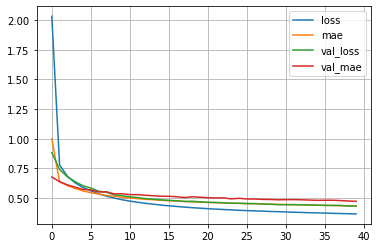

In [151]:
pd.DataFrame(model_fitted.history).plot()
plt.grid(True)



---


### **5. Evaluating the model**


---



In [145]:
model.evaluate(x_test , y_test)

162/162 [==============================] - 0s 889us/step - loss: 0.3768 - mae: 0.4470


[0.3768068850040436, 0.44695842266082764]

In [146]:
x_new = x_test[:3]

In [148]:
y_predict = model.predict(x_new)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [149]:
y_predict


array([[0.67822546],
       [1.8470912 ],
       [4.294616  ]], dtype=float32)

# **5.Saving the model**

In [153]:
model.save("D_L_Regression model_Functional_API")

INFO:tensorflow:Assets written to: D_L_Regression model_Functional_API/assets


In [154]:
%pwd
# used to find the saving path

'/content'

In [157]:
%cd /content/drive

# used to change the saving path

/content/drive


In [158]:
%pwd

'/content/drive'